# Htest
<hr style="border-top-width: 4px; border-top-color: #34609b;">
Save histograms in Tree branches

To run this example, do
```cpp
root > .L htest.C
root > htw()
root > htr1()
root > htr2()
root > htr3()
```




**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-mirror/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer (Beta)</a> from the macro found in the ROOT repository  on Tuesday, January 17, 2017 at 02:43 PM.</small></i>

 A helper function is created: 

In [1]:
%%cpp -d
void htw() {
   //create a Tree with a few branches of type histogram
   //25000 entries are filled in the Tree
   //For each entry, the copy of 3 histograms is written
   //The data base will contain 75000 histograms.
   gBenchmark->Start("hsimple");
   TFile f("ht.root","recreate");
   auto T     = new TTree("T","test");
   auto hpx   = new TH1F("hpx","This is the px distribution",100,-4,4);
   auto hpxpy = new TH2F("hpxpy","py vs px",40,-4,4,40,-4,4);
   auto hprof  = new TProfile("hprof","Profile of pz versus px",100,-4,4,0,20);
   T->Branch("hpx","TH1F",&hpx,32000,0);
   T->Branch("hpxpy","TH2F",&hpxpy,32000,0);
   T->Branch("hprof","TProfile",&hprof,32000,0);
   Float_t px, py, pz;
   for (Int_t i = 0; i < 25000; i++) {
      if (i%1000 == 0) printf("at entry: %d\n",i);
      gRandom->Rannor(px,py);
      pz = px*px + py*py;
      hpx->Fill(px);
      hpxpy->Fill(px,py);
      hprof->Fill(px,pz);
      T->Fill();
   }
   T->Print();
   f.Write();
   gBenchmark->Show("hsimple");
}

 A helper function is created: 

In [2]:
%%cpp -d
void htr1() {
   //connect Tree generated by htw and show histograms for entry 12345
   auto f = new TFile("ht.root");
   auto T = (TTree*)f->Get("T");
   TH1F *hpx = nullptr;
   TH2F *hpxpy = nullptr;
   TProfile *hprof = nullptr;
   T->SetBranchAddress("hpx",&hpx);
   T->SetBranchAddress("hpxpy",&hpxpy);
   T->SetBranchAddress("hprof",&hprof);
   T->GetEntry(12345);
   auto c1 = new TCanvas("c1","test",10,10,600,1000);
   c1->Divide(1,3);
   c1->cd(1);
   hpx->Draw();
   c1->cd(2);
   hpxpy->Draw();
   c1->cd(3);
   hprof->Draw();
   c1->Print("htr1.png");
}

 A helper function is created: 

In [3]:
%%cpp -d
void htr2() {
   //connect Tree generated by htw and show histograms for entry 12345
   // a variant of htr1
   auto f = new TFile("ht.root");
   auto T = (TTree*)f->Get("T");
   auto c1 = new TCanvas("c1","test",10,10,600,1000);
   c1->Divide(1,3);
   c1->cd(1);
   T->Draw("hpx.Draw()","","goff",1,12345);
   c1->cd(2);
   T->Draw("hpxpy.Draw()","","goff",1,12345);
   c1->cd(3);
   T->Draw("hprof.Draw()","","goff",1,12345);
   c1->Print("htr2.png");
}

 A helper function is created: 

In [4]:
%%cpp -d
void htr3() {
   //connect Tree generated by htw
   //read all histograms and plot the RMS of hpx versus the Mean of hprof
   //for each of the 25000 entries
   auto f = new TFile("ht.root");
   auto T = (TTree*)f->Get("T");
   T->Draw("hpx.GetRMS():hprof.GetMean()");
   gPad->Print("htr3.png");
}

In [5]:
htw();
htr1();
htr2();
htr3();

at entry: 0
at entry: 1000
at entry: 2000
at entry: 3000
at entry: 4000
at entry: 5000
at entry: 6000
at entry: 7000
at entry: 8000
at entry: 9000
at entry: 10000
at entry: 11000
at entry: 12000
at entry: 13000
at entry: 14000
at entry: 15000
at entry: 16000
at entry: 17000
at entry: 18000
at entry: 19000
at entry: 20000
at entry: 21000
at entry: 22000
at entry: 23000
at entry: 24000
******************************************************************************
*Tree    :T         : test                                                   *
*Entries :    25000 : Total =       292254026 bytes  File  Size =   32809354 *
*        :          : Tree compression factor =   8.63                       *
******************************************************************************
*Br    0 :hpx       : TH1F                                                   *
*Entries :    25000 : Total  Size=   24000872 bytes  File Size  =    1629629 *
*Baskets :      662 : Basket Size=     787968 bytes  Compres

Info in <TCanvas::Print>: png file htr1.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file htr2.png has been created
Warning in <TASImage::PutPixel>: Out of range width=584 x=358, height=304 y=931
Warning in <TASImage::PutPixel>: Out of range width=584 x=217, height=304 y=877
Warning in <TASImage::PutPixel>: Out of range width=584 x=289, height=304 y=872
Warning in <TASImage::PutPixel>: Out of range width=584 x=265, height=304 y=877
Warning in <TASImage::PutPixel>: Out of range width=584 x=165, height=304 y=840
Warning in <TASImage::PutPixel>: Out of range width=584 x=142, height=304 y=846
Warning in <TASImage::PutPixel>: Out of range width=584 x=64, height=304 y=823
Warning in <TASImage::PutPixel>: Out of range width=584 x=165, height=304 y=787
Warning in <TASImage::PutPixel>: Out of range width=584 x=229, height=304 y=778
Warning in <TASImage::PutPixel>: Out of range width=584 x=330, height=304 y=745
Warning i

Draw all canvases 

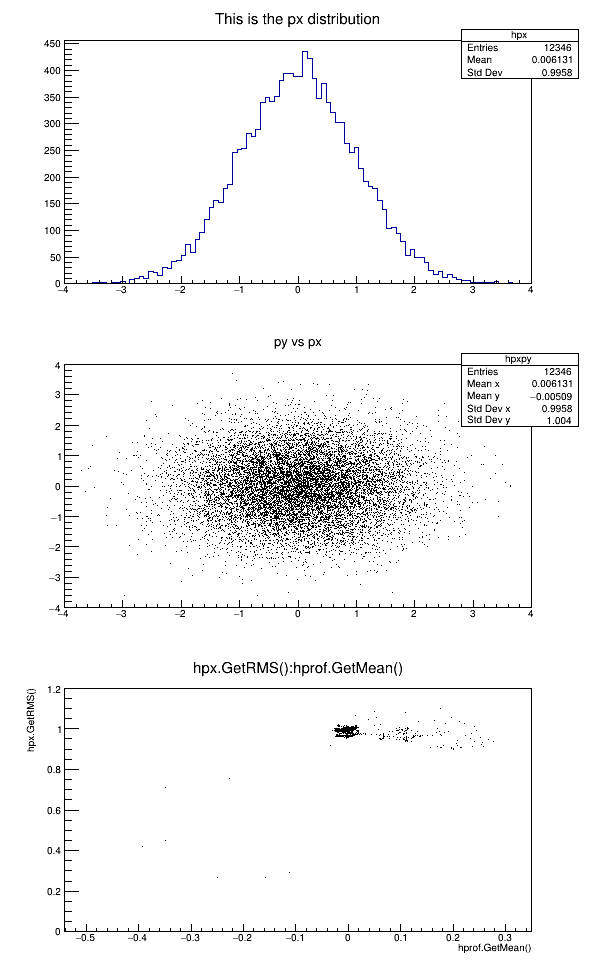

In [6]:
gROOT->GetListOfCanvases()->Draw()